In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/zomato-restaurants-data/zomato.csv
/kaggle/input/zomato-restaurants-data/file5.json
/kaggle/input/zomato-restaurants-data/file1.json
/kaggle/input/zomato-restaurants-data/file2.json
/kaggle/input/zomato-restaurants-data/file4.json
/kaggle/input/zomato-restaurants-data/file3.json
/kaggle/input/zomato-restaurants-data/Country-Code.xlsx


In [2]:
# importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# importing csv file using pandas
df0 = pd.read_csv('/kaggle/input/zomato-restaurants-data/zomato.csv',encoding='latin-1') 
df1 = pd.read_excel('/kaggle/input/zomato-restaurants-data/Country-Code.xlsx')

In [4]:
# setting custom pandas custom options

pd.set_option('display.max_columns',50)
sns.set_style('whitegrid')

In [5]:
df0.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [6]:
df0.shape

(9551, 21)

In [7]:
df0.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [8]:
df1

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia
5,148,New Zealand
6,162,Phillipines
7,166,Qatar
8,184,Singapore
9,189,South Africa


In [9]:
# merginng both dataframes on country code

data = pd.merge(left=df0,right=df1,how='left',on='Country Code')

In [10]:
data.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines


In [11]:
data.shape

(9551, 22)

In [12]:
# Dropping columns that are not useful.
# Currency for average price column is not given. Hence dropping the average price columnn
data.drop(columns=['Restaurant ID','Country Code','Address','Locality','Locality Verbose','Latitude','Longitude','Average Cost for two'],inplace=True)

In [13]:
data.head()

,Restaurant Name,City,Cuisines,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,Le Petit Souffle,Makati City,"French, Japanese, Desserts",Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,Izakaya Kikufuji,Makati City,Japanese,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,Heat - Edsa Shangri-La,Mandaluyong City,"Seafood, Asian, Filipino, Indian",Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,Ooma,Mandaluyong City,"Japanese, Sushi",Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,Sambo Kojin,Mandaluyong City,"Japanese, Korean",Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines


In [14]:
# Reordering columns

data = data.reindex(columns=['Restaurant Name', 'Country' ,'City', 'Currency','Price range', 
                     'Cuisines', 'Has Table booking', 'Has Online delivery',
       'Is delivering now', 'Switch to order menu' ,'Aggregate rating', 'Rating color', 'Rating text', 'Votes'],)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 9550
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant Name       9551 non-null   object 
 1   Country               9551 non-null   object 
 2   City                  9551 non-null   object 
 3   Currency              9551 non-null   object 
 4   Price range           9551 non-null   int64  
 5   Cuisines              9542 non-null   object 
 6   Has Table booking     9551 non-null   object 
 7   Has Online delivery   9551 non-null   object 
 8   Is delivering now     9551 non-null   object 
 9   Switch to order menu  9551 non-null   object 
 10  Aggregate rating      9551 non-null   float64
 11  Rating color          9551 non-null   object 
 12  Rating text           9551 non-null   object 
 13  Votes                 9551 non-null   int64  
dtypes: float64(1), int64(2), object(11)
memory usage: 1.1+ MB


- Price range column has values ranging from 1 to 4. Changing the data type to str for ease of analysis. 

In [16]:
data['Price range'] = data['Price range'].astype(str)

In [17]:
data.isnull().sum()

Restaurant Name         0
Country                 0
City                    0
Currency                0
Price range             0
Cuisines                9
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

# <font color = red>Observation:</font>
- No null values present in the data. Since the data is very clean, lets begin analyzing the columns


In [18]:
cat_cols = []
num_cols = []

for col in list(data.columns):
    if data[col].dtype == 'object':
        cat_cols.append(col)
    else:
        num_cols.append(col)
print()        
print('Total Number of Columns in DataFrame: ',len(data.columns))
print()
print('---' * 45)
print('Categorical Columns in DataFrame: ', cat_cols)
print()
print('Number of Categorical Columns in DataFrame: ', len(cat_cols))
print()
print('---' * 45)
print()
print('Numerical Columns in DataFrame: ',num_cols)
print()
print('Number of Numerical Columns in DataFrame: ',len(num_cols))


Total Number of Columns in DataFrame:  14

---------------------------------------------------------------------------------------------------------------------------------------
Categorical Columns in DataFrame:  ['Restaurant Name', 'Country', 'City', 'Currency', 'Price range', 'Cuisines', 'Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu', 'Rating color', 'Rating text']

Number of Categorical Columns in DataFrame:  12

---------------------------------------------------------------------------------------------------------------------------------------

Numerical Columns in DataFrame:  ['Aggregate rating', 'Votes']

Number of Numerical Columns in DataFrame:  2


# <font color = red>Analyzing Categorical columns</font>

In [19]:
for i in cat_cols:
    print('Value Counts for {} column:'.format(i))
    print(data[i].value_counts())
    print()
    print('.' * 60)
    print('Value Counts for {} column in percentage:'.format(i))
    print(data[i].value_counts(normalize=True)*100)
    print()
    print('.' * 60)
    print()
    print('Mode of {} column:'.format(i),data[i].mode()[0])
    print()
    print('X'*60)
    print()

Value Counts for Restaurant Name column:
Cafe Coffee Day             83
Domino's Pizza              79
Subway                      63
Green Chick Chop            51
McDonald's                  48
                            ..
Odeon Social                 1
Johnny Rockets               1
House of Commons             1
HotMess                      1
Walter's Coffee Roastery     1
Name: Restaurant Name, Length: 7446, dtype: int64

............................................................
Value Counts for Restaurant Name column in percentage:
Cafe Coffee Day             0.869019
Domino's Pizza              0.827139
Subway                      0.659617
Green Chick Chop            0.533975
McDonald's                  0.502565
                              ...   
Odeon Social                0.010470
Johnny Rockets              0.010470
House of Commons            0.010470
HotMess                     0.010470
Walter's Coffee Roastery    0.010470
Name: Restaurant Name, Length: 7446, dtype: 

# <font color = red> Obervations: </font>
- 'Cafe Coffee Day' is the most listed in `Restraunts` column with 0.8% of total restauraunts
- 90% of the restaurants in the data are from India 
- 58% of the restaurants in the data are in Delhi
- 9.8% of the restaurants serve North Indian cusine
- 40% of the restaurants have Average rating
- 46% of the restaurants have a price range of  '1'.

# <font color = red>Analyzing Numerical columns</font>


Statistical information for Aggregate rating column: 

count    9551.000000
mean        2.666370
std         1.516378
min         0.000000
25%         2.500000
50%         3.200000
75%         3.700000
max         4.900000
Name: Aggregate rating, dtype: float64

............................................................


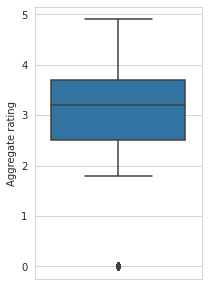


XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

Statistical information for Votes column: 

count     9551.000000
mean       156.909748
std        430.169145
min          0.000000
25%          5.000000
50%         31.000000
75%        131.000000
max      10934.000000
Name: Votes, dtype: float64

............................................................


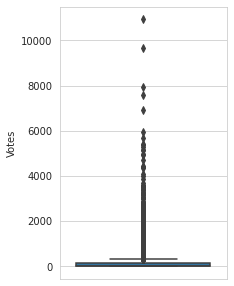


XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX


In [20]:
for i in num_cols:
    print()
    print('Statistical information for {} column: '.format(i))
    print()
    print(data[i].describe())
    print()
    print('.' * 60)
    plt.figure(figsize=(3,5))
    sns.boxplot(y =data[i])
    plt.show()
    print()
    print('X'*60)

In [21]:
data['Votes'].quantile(0.99)

1882.5

# <font color = red>Observations</font>
- 99% restaurants have number of voters less than 10,000
-  Meian aggregate rating is 3.2

# <font color = red>Bi-variate Analysis</font>

In [22]:
# Categorical-Numerical